## Symmetric Tree


Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

 

Example 1:

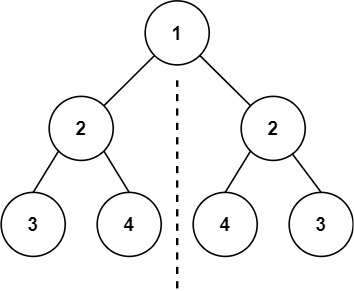


* Input: root = [1,2,2,3,4,4,3]
* Output: true


Example 2:

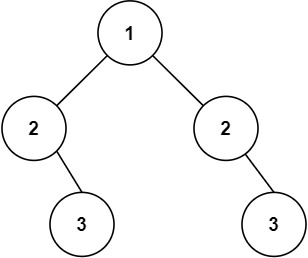

* Input: root = [1,2,2,null,3,null,3]
* Output: false
 

Constraints:

The number of nodes in the tree is in the range [1, 1000].

-100 <= Node.val <= 100
 

Follow up: Could you solve it both recursively and iteratively?

> iterative method

In [ ]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
from collections import deque

class Solution(object):
    def isSymmetric(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """

        """
        define the problem in seperate branch
        left_branch --> left first method
        right branch --> right first method
        generate two stacks apart from root 
        compare the two stacks
        """
        if( not( root.left or root.right ) ):
            return True
        if( not( root.left and root.right ) ):
            return False

        #get left substree and right subtree
        left_tree , right_tree = root.left , root.right
        left_final , right_final = [left_tree.val],[right_tree.val]
        left_stack , right_stack = deque([left_tree]) , deque([right_tree])
        while len(left_stack)>0 :
            node = left_stack.popleft()
            if node.left is not None: 
                left_stack.append( node.left )
                left_final.append( node.left.val )
            else:
                left_final.append('null')
            if node.right is not None : 
                left_stack.append( node.right )
                left_final.append( node.right.val )
            else:
                left_final.append('null')

        while len(right_stack)>0 :
            node = right_stack.popleft()
            if node.right is not None : 
                right_stack.append( node.right )
                right_final.append(node.right.val)
            else:
                right_final.append('null')
            if node.left is not None : 
                right_stack.append(node.left)
                right_final.append(node.left.val)
            else:
                right_final.append('null')
               
        return right_final == left_final

> recursive method

In [ ]:
class Solution(object):
    def isSymmetric(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
               
        # return right_final == left_final
        def compare_nodes(left_root , right_root):
            if( not( left_root or right_root ) ):
                return True
            
            if( not(left_root and right_root) ):
                return False

            # next recursive 
            left_first_res = compare_nodes(left_root.left , right_root.right)
            right_first_res = compare_nodes(left_root.right , right_root.left)

            return ( left_first_res and 
                     right_first_res and 
                     ( left_root.val == right_root.val ) )
            
        if root is None : return False

        return compare_nodes( root.left , root.right )